In [1]:
#Importing required modules
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn import metrics

In [2]:
#read the dataset
df = pd.read_csv("C:/Users/nithi/OneDrive/Desktop/Cleaned_Laptop_data.csv")

In [3]:
df.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [5]:
print(df.shape)
df=df.drop_duplicates(keep='last')
print(df.shape)

(896, 23)
(876, 23)


In [6]:
df1=df.drop(['warranty', 'msoffice','old_price','discount','reviews'], axis=1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 895
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            876 non-null    object 
 1   model            876 non-null    object 
 2   processor_brand  876 non-null    object 
 3   processor_name   876 non-null    object 
 4   processor_gnrtn  876 non-null    object 
 5   ram_gb           876 non-null    object 
 6   ram_type         876 non-null    object 
 7   ssd              876 non-null    object 
 8   hdd              876 non-null    object 
 9   os               876 non-null    object 
 10  os_bit           876 non-null    object 
 11  graphic_card_gb  876 non-null    int64  
 12  weight           876 non-null    object 
 13  display_size     876 non-null    object 
 14  Touchscreen      876 non-null    object 
 15  latest_price     876 non-null    int64  
 16  star_rating      876 non-null    float64
 17  ratings         

In [8]:
df1 = df1[['brand', 'model', 'os','os_bit','processor_brand', 'processor_name','processor_gnrtn','ram_gb','ram_type','hdd','ssd','display_size','weight','Touchscreen','star_rating','ratings','latest_price']]

In [9]:
df1.head(30)

,brand,model,os,os_bit,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,hdd,ssd,display_size,weight,Touchscreen,star_rating,ratings,latest_price
0,Lenovo,A6-9225,Windows,64-bit,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,1024 GB,0 GB,Missing,ThinNlight,No,3.7,63,24990
1,Lenovo,Ideapad,Windows,64-bit,AMD,APU Dual,10th,4 GB GB,DDR4,512 GB,0 GB,Missing,Casual,No,3.6,1894,19590
2,Avita,PURA,Windows,64-bit,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,128 GB,Missing,ThinNlight,No,3.7,1153,19990
3,Avita,PURA,Windows,64-bit,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,128 GB,Missing,ThinNlight,No,3.7,1153,21490
4,Avita,PURA,Windows,64-bit,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,256 GB,Missing,ThinNlight,No,3.7,1657,24990
5,Avita,PURA,Windows,64-bit,AMD,APU Dual,10th,8 GB GB,DDR4,0 GB,256 GB,14,ThinNlight,No,3.7,1657,24990
6,HP,APU,Windows,32-bit,AMD,APU Dual,10th,4 GB GB,DDR4,1024 GB,0 GB,14,Casual,No,3.9,1185,20900
7,Lenovo,APU,Windows,64-bit,AMD,APU Dual,10th,4 GB GB,DDR4,1024 GB,0 GB,Missing,Casual,No,3.9,219,21896
8,HP,Athlon,Windows,32-bit,AMD,Athlon Dual,10th,32 GB GB,DDR4,0 GB,32 GB,14,Casual,No,0.0,0,26899
9,acer,Aspire,Windows,64-bit,AMD,Athlon Dual,10th,4 GB GB,DDR4,0 GB,256 GB,Missing,Casual,No,4.2,76,31990


In [10]:
i = 0
unique_values = []
for column_name in df1.columns:
    unique_values.append(len(df1[column_name].unique()))
    print(f"'{column_name}' {unique_values[i]:{30 - len(column_name)}} unique values")                                                              
    i+=1

'brand'                        21 unique values
'model'                       117 unique values
'os'                            3 unique values
'os_bit'                        2 unique values
'processor_brand'               5 unique values
'processor_name'               28 unique values
'processor_gnrtn'               8 unique values
'ram_gb'                        4 unique values
'ram_type'                      6 unique values
'hdd'                           4 unique values
'ssd'                           8 unique values
'display_size'                 16 unique values
'weight'                        3 unique values
'Touchscreen'                   2 unique values
'star_rating'                  30 unique values
'ratings'                     310 unique values
'latest_price'                429 unique values


In [11]:
categorical_features=['brand', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'weight', 'display_size', 'Touchscreen', 'star_rating']

<Figure size 1080x1800 with 0 Axes>

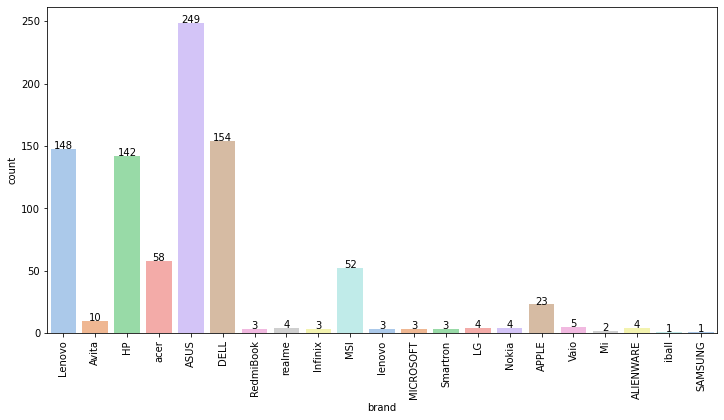

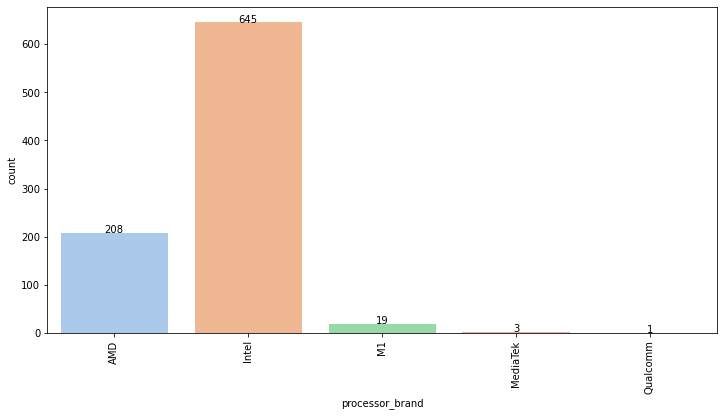

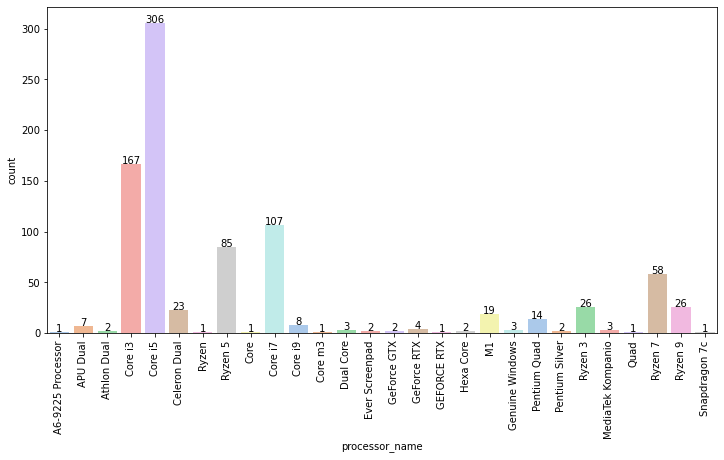

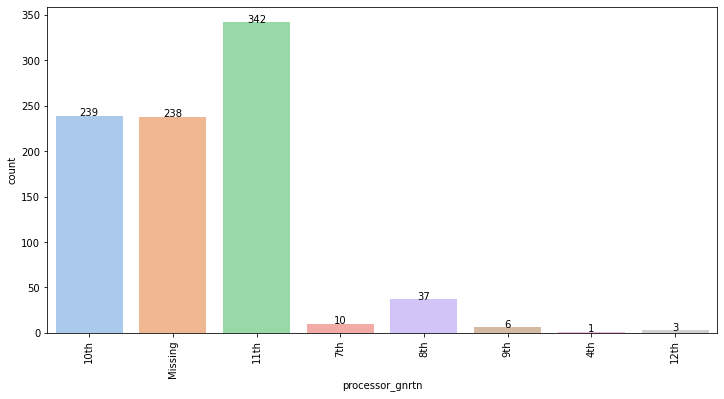

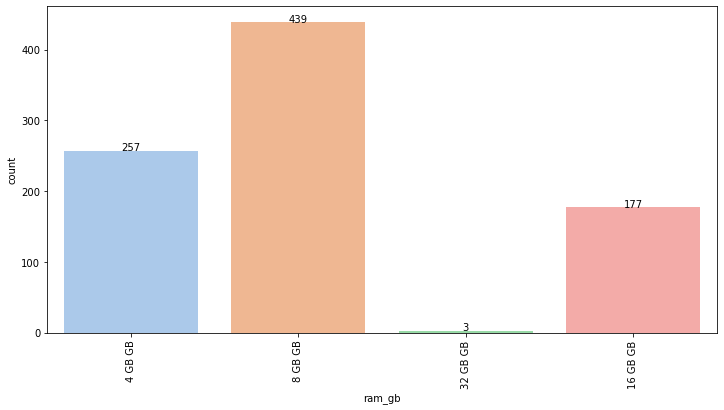

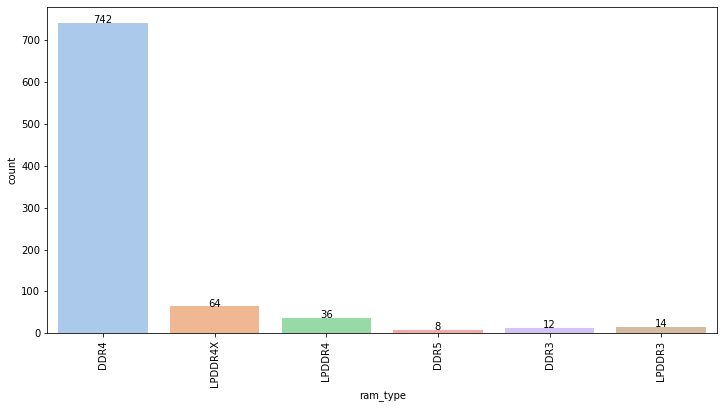

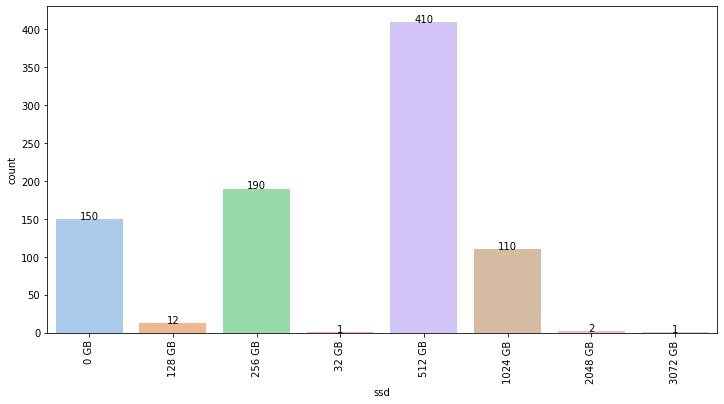

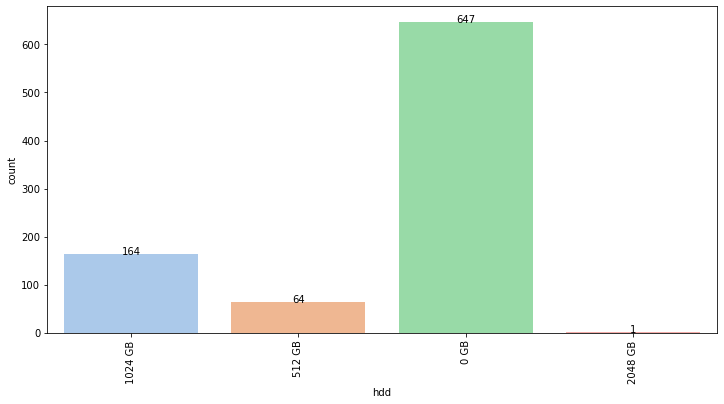

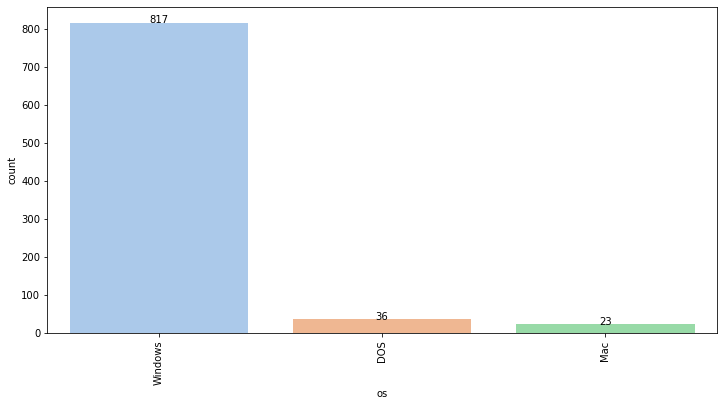

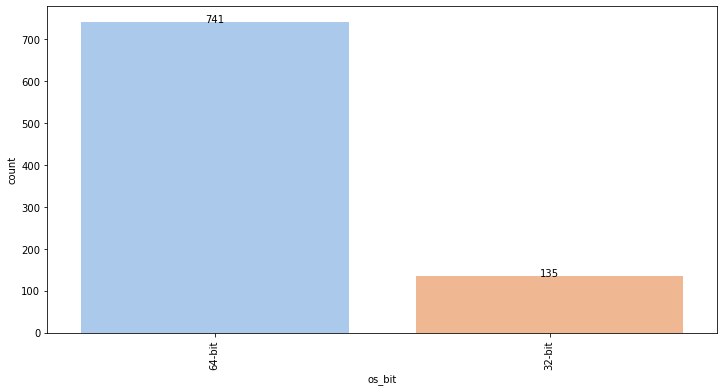

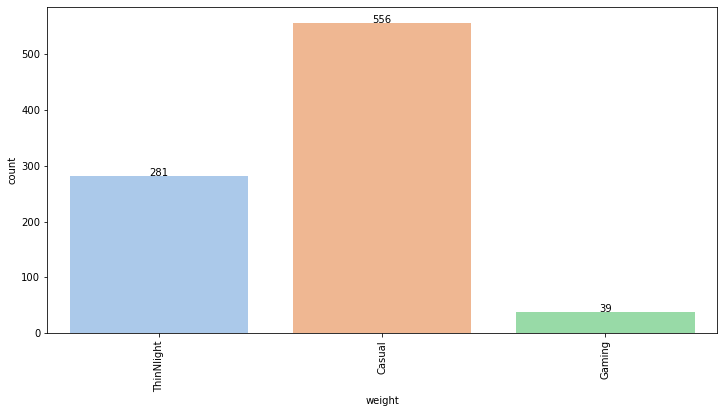

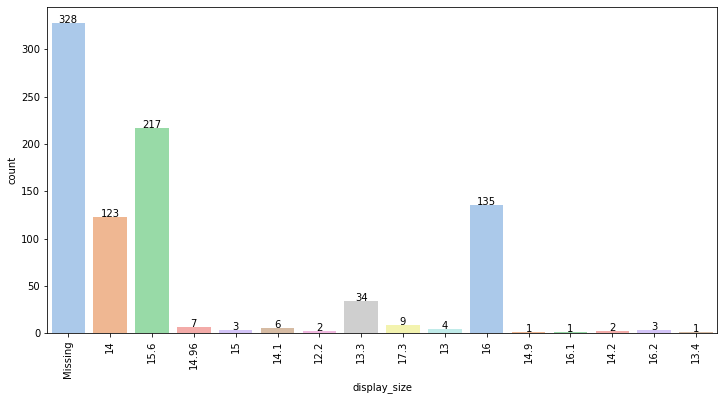

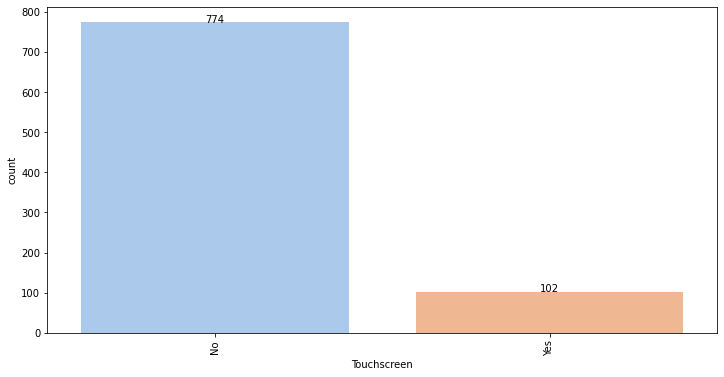

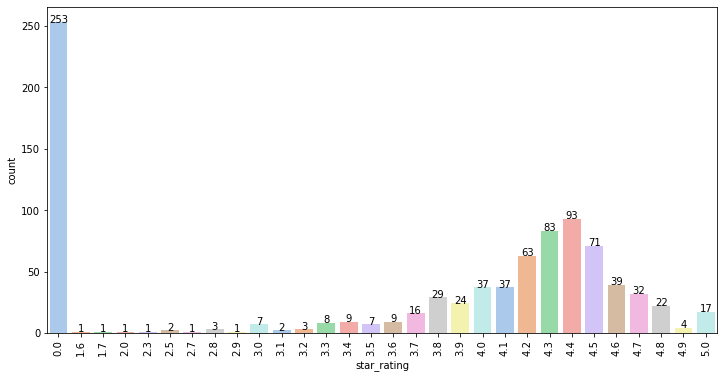

In [12]:
graphlist = []
plt.figure(figsize = (15,25))
for i in range(len(categorical_features)):
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = categorical_features[i] , data = df1,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  graphlist.append(graph)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<Figure size 1080x1800 with 0 Axes>

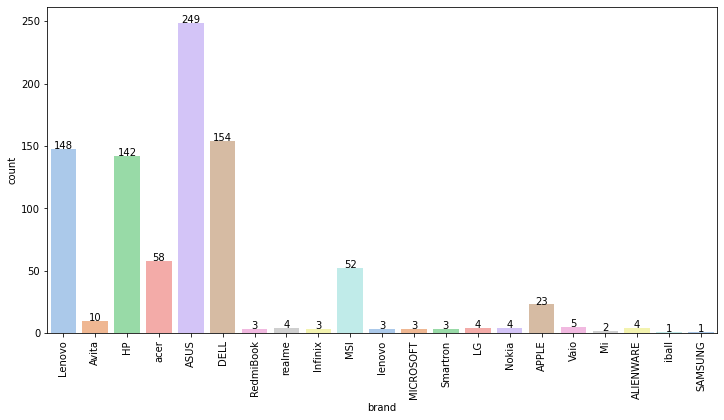

In [24]:
plt.figure(figsize = (15,25))
fig, ax1 = plt.subplots(figsize=(12,6))
graph = sns.countplot(ax=ax1,x = categorical_features[0] , data = df1,palette='pastel')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [38]:
for feature in categorical_features:
  #k=df1[feature]
  print(f'Feature {feature} has unique values:',df1[feature].unique())
  print(30*'---')

Feature brand has unique values: ['Lenovo' 'Avita' 'HP' 'acer' 'ASUS' 'DELL' 'RedmiBook' 'realme' 'Infinix'
 'MSI' 'lenovo' 'MICROSOFT' 'Smartron' 'LG' 'Nokia' 'APPLE' 'Vaio' 'Mi'
 'ALIENWARE' 'iball' 'SAMSUNG']
------------------------------------------------------------------------------------------
Feature processor_brand has unique values: ['AMD' 'Intel' 'M1' 'MediaTek' 'Qualcomm']
------------------------------------------------------------------------------------------
Feature processor_name has unique values: ['A6-9225 Processor' 'APU Dual' 'Athlon Dual' 'Core i3' 'Core i5'
 'Celeron Dual' 'Ryzen' 'Ryzen 5' 'Core' 'Core i7' 'Core i9' 'Core m3'
 'Dual Core' 'Ever Screenpad' 'GeForce GTX' 'GeForce RTX' 'GEFORCE RTX'
 'Hexa Core' 'M1' 'Genuine Windows' 'Pentium Quad' 'Pentium Silver'
 'Ryzen 3' 'MediaTek Kompanio' 'Quad' 'Ryzen 7' 'Ryzen 9' 'Snapdragon 7c']
------------------------------------------------------------------------------------------
Feature processor_gnrtn has unique 

In [28]:
df1['processor_gnrtn'].value_counts().to_frame()

,processor_gnrtn
11th,342
10th,239
Missing,238
8th,37
7th,10
9th,6
12th,3
4th,1


In [66]:
df1['display_size'].value_counts().to_frame()

,display_size
Missing,328
15.6,217
16,135
14,123
13.3,34
17.3,9
14.96,7
14.1,6
13,4
15,3


In [16]:
df1.replace('Missing', np.NaN,inplace=True)
df1.isnull().sum()

brand                0
model               95
os                   0
os_bit               0
processor_brand      0
processor_name       0
processor_gnrtn    238
ram_gb               0
ram_type             0
hdd                  0
ssd                  0
display_size       328
weight               0
Touchscreen          0
star_rating          0
ratings              0
latest_price         0
dtype: int64

In [17]:
print(df1.iloc[400])

brand                   HP
model              Spectre
os                 Windows
os_bit              64-bit
processor_brand      Intel
processor_name     Core i5
processor_gnrtn       11th
ram_gb             8 GB GB
ram_type           LPDDR4X
hdd                   0 GB
ssd                 512 GB
display_size            16
weight              Casual
Touchscreen            Yes
star_rating            0.0
ratings                  0
latest_price        129999
Name: 407, dtype: object


In [18]:
df2 = df1.drop(['model', 'star_rating','ratings','latest_price'], axis=1)

In [19]:
print(df2.iloc[400])

brand                   HP
os                 Windows
os_bit              64-bit
processor_brand      Intel
processor_name     Core i5
processor_gnrtn       11th
ram_gb             8 GB GB
ram_type           LPDDR4X
hdd                   0 GB
ssd                 512 GB
display_size            16
weight              Casual
Touchscreen            Yes
Name: 407, dtype: object


In [20]:
user_input = {'brand': 'DELL', 'os': 'Windows', 'os_bit': '64-bit', 'processor_brand' : 'Intel','processor_name' : 'Core i7', 'processor_gnrtn' : '8th', 'ram_gb' : '8 GB GB', 'ram_type' : 'DDR3', 'ssd' : '256 GB', 'hdd' : '0 GB', 'weight' : 'ThinNlight', 'display_size' : '13.3', 'Touchscreen' : 'No'}

In [21]:
df2 = df2.append(user_input, ignore_index = True)

In [22]:
#users preferences
df2.iloc[876]
user_pref = list(df2.iloc[876])
print(user_pref)

['DELL', 'Windows', '64-bit', 'Intel', 'Core i7', '8th', '8 GB GB', 'DDR3', '0 GB', '256 GB', '13.3', 'ThinNlight', 'No']


In [23]:
print(df1.shape)
print(df2.shape)

(876, 17)
(877, 13)


In [24]:
le = preprocessing.LabelEncoder()
df1_encoded=pd.DataFrame()
#ASSIGNS NUMBER TO EVERY LABEL
for i in df1.columns:
    le.fit(df1[i])
    df1_encoded[i]=le.transform(df1[i])
df1_encoded.head()

,brand,model,os,os_bit,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,hdd,ssd,display_size,weight,Touchscreen,star_rating,ratings,latest_price
0,8,11,2,1,0,0,0,2,1,1,0,15,2,0,16,59,16
1,8,59,2,1,0,1,0,2,1,3,0,15,0,0,15,276,5
2,3,74,2,1,0,1,0,2,1,0,2,15,2,0,16,247,6
3,3,74,2,1,0,1,0,2,1,0,2,15,2,0,16,247,9
4,3,74,2,1,0,1,0,2,1,0,4,15,2,0,16,268,16


In [25]:
le = preprocessing.LabelEncoder()
df2_encoded=pd.DataFrame()
for i in df2.columns:
    le.fit(df2[i])
    df2_encoded[i]=le.transform(df2[i])
df2_encoded.head()

,brand,os,os_bit,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,hdd,ssd,display_size,weight,Touchscreen
0,8,2,1,0,0,0,2,1,1,0,15,2,0
1,8,2,1,0,1,0,2,1,3,0,15,0,0
2,3,2,1,0,1,0,2,1,0,2,15,2,0
3,3,2,1,0,1,0,2,1,0,2,15,2,0
4,3,2,1,0,1,0,2,1,0,4,15,2,0


In [26]:
df2_encoded.shape

(877, 13)

In [27]:
user_pref_encoded = list(df2_encoded.iloc[876])

In [28]:
print(user_pref_encoded)

[4, 2, 1, 1, 7, 5, 3, 0, 0, 4, 2, 2, 0]


In [29]:
#df2_encoded = df2_encoded.drop([896])
print(df1_encoded.shape)
print(df2_encoded.shape)

(876, 17)
(877, 13)


In [30]:
df2_encoded.drop([876], axis=0, inplace=True)

In [34]:
n = 10
recommendations = df1_encoded.loc[(df2_encoded - user_pref_encoded).pow(2).sum(axis=1).nsmallest(n).index]
recommendations.head(n)
target = list(recommendations.index.values)

In [35]:
resultdf=df1.iloc[target]
resultdf.head(10)

,brand,model,os,os_bit,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,hdd,ssd,display_size,weight,Touchscreen,star_rating,ratings,latest_price
524,Avita,Liber,Windows,64-bit,Intel,Core i7,8th,8 GB GB,DDR4,0 GB,256 GB,14,ThinNlight,No,0.0,0,73990
228,HP,Pavilion,Windows,64-bit,Intel,Core i5,8th,8 GB GB,DDR4,0 GB,128 GB,13.3,ThinNlight,No,4.3,129,76012
433,Avita,Liber,Windows,64-bit,Intel,Core i5,7th,8 GB GB,DDR4,0 GB,512 GB,13.3,ThinNlight,No,0.0,0,65556
101,HP,Pavilion,Windows,64-bit,Intel,Core i3,8th,4 GB GB,DDR4,0 GB,256 GB,14,Casual,Yes,4.4,71,54238
434,Avita,Liber,Windows,64-bit,Intel,Core i5,8th,8 GB GB,DDR4,0 GB,512 GB,14,ThinNlight,No,3.4,17,44990
439,Avita,Liber,Windows,64-bit,Intel,Core i5,8th,8 GB GB,DDR4,0 GB,512 GB,14,ThinNlight,No,3.4,17,73063
573,ASUS,ZenBook,Windows,64-bit,Intel,Core i7,8th,8 GB GB,LPDDR3,0 GB,512 GB,13.3,ThinNlight,No,4.3,40,81990
498,DELL,Vostro,Windows,64-bit,Intel,Core i5,11th,8 GB GB,DDR4,1024 GB,256 GB,14,ThinNlight,No,3.8,353,54990
63,DELL,Vostro,Windows,64-bit,Intel,Core i3,11th,8 GB GB,DDR4,0 GB,256 GB,14,ThinNlight,No,4.3,1753,41490
29,HP,Celeron,Windows,64-bit,Intel,Celeron Dual,NaN,8 GB GB,DDR4,0 GB,256 GB,14,ThinNlight,No,4.0,58,32490


In [ ]:
#user_input = {'brand': 'DELL', 'os': 'Windows', 'os_bit': '64-bit', 'processor_brand' : 'Intel','processor_name' : 'Core i7', 'processor_gnrtn' : '8th', 'ram_gb' : '8 GB GB', 'ram_type' : 'DDR3', 'ssd' : '256 GB', 'hdd' : '0 GB', 'weight' : 'ThinNlight', 'display_size' : '13.3', 'Touchscreen' : 'No'}
